<a href="https://colab.research.google.com/github/SAMREEN2104/Nimmy/blob/master/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install keras_applications

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Operation cancelled by user


In [ ]:
from __future__ import print_function

import numpy as np
import warnings

from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D
import keras.utils as image
#from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from keras_applications.imagenet_utils import _obtain_input_shape 
from keras.utils.layer_utils import get_source_inputs

In [ ]:
def VGGupdated(input_tensor=None,classes=4):    
   
    img_rows, img_cols = 300, 300   # by default size is 224,224
    img_channels = 3

    img_dim = (img_rows, img_cols, img_channels)
   
    img_input = Input(shape=img_dim)
    
    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

    
    # Classification block
    x = Flatten(name='flatten')(x)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dense(4096, activation='relu', name='fc2')(x)
    x = Dense(classes, activation='softmax', name='predictions')(x)

    # Create model.
   
     
    model = Model(inputs = img_input, outputs = x, name='VGGdemo')


    return model

In [ ]:
model = VGGupdated(classes = 4) # bedroom and diningroom

In [ ]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('/content/gdrive/My Drive/rooms_dataset/')

room_types = os.listdir('/content/gdrive/My Drive/rooms_dataset/')
print (room_types)  #what kinds of rooms are in this dataset

print("Types of rooms found: ", len(dataset_path))



['1', '2', '3', '4']
Types of rooms found:  4


In [ ]:
rooms = []

for item in room_types:
 # Get all the file names
 all_rooms = os.listdir('/content/gdrive/My Drive/rooms_dataset/' + '/' +item)
 #print(all_shoes)

 # Add them to the list
 for room in all_rooms:
    rooms.append((item, str("D:/rooms_dataset" + '/' +item) + '/' + room))
    print(rooms)

[('1', 'D:/rooms_dataset/1/1 (3) - Copy.jpg')]
[('1', 'D:/rooms_dataset/1/1 (3) - Copy.jpg'), ('1', 'D:/rooms_dataset/1/1 (3).jpg')]
[('1', 'D:/rooms_dataset/1/1 (3) - Copy.jpg'), ('1', 'D:/rooms_dataset/1/1 (3).jpg'), ('1', 'D:/rooms_dataset/1/1 (1).jpg')]
[('1', 'D:/rooms_dataset/1/1 (3) - Copy.jpg'), ('1', 'D:/rooms_dataset/1/1 (3).jpg'), ('1', 'D:/rooms_dataset/1/1 (1).jpg'), ('1', 'D:/rooms_dataset/1/1 (1) - Copy.jpg')]
[('1', 'D:/rooms_dataset/1/1 (3) - Copy.jpg'), ('1', 'D:/rooms_dataset/1/1 (3).jpg'), ('1', 'D:/rooms_dataset/1/1 (1).jpg'), ('1', 'D:/rooms_dataset/1/1 (1) - Copy.jpg'), ('1', 'D:/rooms_dataset/1/1 (2).jpg')]
[('1', 'D:/rooms_dataset/1/1 (3) - Copy.jpg'), ('1', 'D:/rooms_dataset/1/1 (3).jpg'), ('1', 'D:/rooms_dataset/1/1 (1).jpg'), ('1', 'D:/rooms_dataset/1/1 (1) - Copy.jpg'), ('1', 'D:/rooms_dataset/1/1 (2).jpg'), ('1', 'D:/rooms_dataset/1/1 (2) - Copy.jpg')]
[('1', 'D:/rooms_dataset/1/1 (3) - Copy.jpg'), ('1', 'D:/rooms_dataset/1/1 (3).jpg'), ('1', 'D:/rooms_dat

In [ ]:
# Build a dataframe        
rooms_df = pd.DataFrame(data=rooms, columns=['room type', 'image'])
print(rooms_df.head())
#print(rooms_df.tail())


  room type                                image
0         1  D:/rooms_dataset/1/1 (3) - Copy.jpg
1         1         D:/rooms_dataset/1/1 (3).jpg
2         1         D:/rooms_dataset/1/1 (1).jpg
3         1  D:/rooms_dataset/1/1 (1) - Copy.jpg
4         1         D:/rooms_dataset/1/1 (2).jpg


In [ ]:
# Let's check how many samples for each category are present
print("Total number of rooms in the dataset: ", len(rooms_df))

room_count = rooms_df['room type'].value_counts()

print("rooms in each category: ")
print(room_count)


Total number of rooms in the dataset:  80
rooms in each category: 
1    20
2    20
3    20
4    20
Name: room type, dtype: int64


In [ ]:
import cv2
path = '/content/gdrive/My Drive/rooms_dataset/'


im_size = 300

images = []
labels = []

for i in room_types:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [ ]:
images = np.array(images)

images = images.astype('float32') / 255.0
images.shape    


(80, 300, 300, 3)

In [ ]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.compose import make_column_transformer
y=rooms_df['room type'].values
#print(y[:5])

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]


In [ ]:
y=y.reshape(-1,1)
A = make_column_transformer(
    (OneHotEncoder(categories='auto'), [0]), 
    remainder="passthrough")

Y=A.fit_transform(y)

Y.shape  #(40, 2)

(80, 4)

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(76, 300, 300, 3)
(76, 4)
(4, 300, 300, 3)
(4, 4)


In [ ]:
model.fit(train_x, train_y, epochs = 1, batch_size = 32)  

Epoch 1/20


TypeError: ignored

In [ ]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
#print ("Test Accuracy = " + str(preds[1]))

1/1 [==============================] - 4s 4s/step - loss: 0.6971 - accuracy: 0.3333
Loss = 0.6971375942230225


Input image shape: (1, 300, 300, 3)


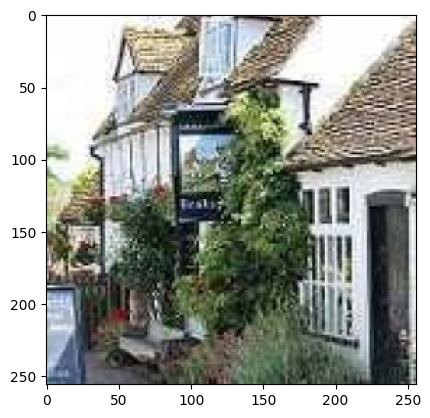

In [ ]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow

img_path = '/content/gdrive/My Drive/rooms_dataset/test_img.jpg'

img = image.load_img(img_path, target_size=(300, 300))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [ ]:
print(model.predict(x))

1/1 [==============================] - 2s 2s/step
[[0.48623493 0.51376516]]
